# <center>Block 0: Vectors and matrices in R</center>
### <center>Alfred Galichon (NYU)</center>
## <center>`math+econ+code' masterclass on matching models, optimal transport and applications</center>
<center>© 2018-2019 by Alfred Galichon. Support from NSF grant DMS-1716489 is acknowledged.</center>


## Vectors and matrices in R
* One of the reason the R language is so appealing is the powerful matrix algebra functionalities. However, there are a few points to understand to make efficient use of it. This tutorial is a brief introduction to these topics -- vectorization, operations on vectors and matrices, higher-dimensional arrays, Kronecker products and sparse matrices.

* This is *not* a tutorial on R itself. They are plenty good ones available on the web.


## Vectorization and memory order

* R is a language based on matrices; however matrices are represented in a *vectorized* way as a sequence of numbers in the computers memory. This representation can involve either stacking the lines, or stacking the columns.

* Different programming languages can use either of the two stacking conventions:
    + Stacking the lines (Row-major order) is used by C, and is the default convention for for Python (Numpy).
    + Stacking the columns (Column-major order) is used by Fortran, Matlab, R, and most underlying core linear algebra libraries (like BLAS). A $2\times2$ matrix $A$ is then vectorized as $\left(  A_{11},A_{21},A_{12},A_{22}\right)$. Thus, we shall remember that R represents matrices by **varying the first index first**.

In [2]:
tst = matrix(c(11,21,31,12,22,32),3,2)
print(tst)
print(matrix(tst,2,3))

     [,1] [,2]
[1,]   11   12
[2,]   21   22
[3,]   31   32
     [,1] [,2] [,3]
[1,]   11   31   22
[2,]   21   12   32



* More generally, a $2\times2\times2$ 3-dimensional array $A$ will be represented as $\left(A_{111},A_{211},A_{121},A_{221},A_{112},A_{212},A_{122},A_{222}\right) $, and so on.

In [3]:
tst2 = array(0,dim=c(3,3,3))
for (i in 1:3) {
  for (j in 1:3){
    for (k in 1:3){
      tst2[i,j,k] = 100*i+10*j+k
    }
  }
}
print(c(tst2))

 [1] 111 211 311 121 221 321 131 231 331 112 212 312 122 222 322 132 232 332 113
[20] 213 313 123 223 323 133 233 333


## Vectorizing functions

* If f is a function defined to take a scalar argument, then applying f to a vector will return the value of f on the first entry of the vector and will generate a warning message. E.g. `f(c(1,2))` will return the same as `f(1)`.


In [3]:
f = function (x){
  if (x>0) {
    return(1) } else {
    return(-1)
  }}

print(f(c(0,1))) # wrong! 

Warning message in if (x > 0) {:
"the condition has length > 1 and only the first element will be used"

[1] -1


* Here, we wanted to apply f on each entries of the vector. In this case, one needs to vectorize the function, by doing `Vectorize(f)(c(1,2))`, which will return `[f(1),f(2)]`.

In [4]:
fvec = Vectorize(f)
print(fvec(c(0,1))) # correct!

[1] -1  1


* Note that a number of built-in operators and functions are already vectorized.
    + E.g. `c(-2,2)>0` will produce `[FALSE, TRUE]`
    + But all functions are not vectorized, e.g. sum, max...
* Back to our example, one could have used `ifelse`:

In [5]:
fbis = function (x) (ifelse(x>0,1,-1))
print(fbis(c(0,1))) # correct again!

[1] -1  1


* As another example, vectorizing functions is often quite useful for plotting:

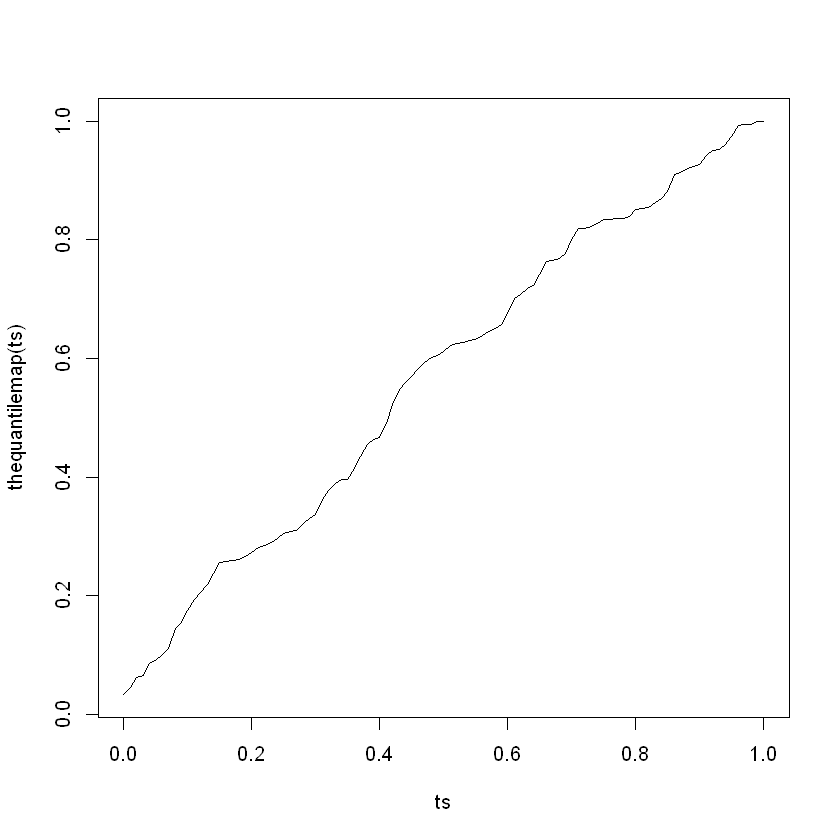

In [6]:
# Example of use for plotting a function
xs = runif(100)
thequantilemap = Vectorize(function (t) (quantile(xs,t)))
ts = (0:100)/100
vals = thequantilemap(ts)
plot(x = ts,y = thequantilemap(ts),type = 'l' )

## Vector and matrix multiplication
* Contrary to Matlab, in R, the operator `*` is not the matrix product, but the termwise product. Calling `v1 * v2` thus requires that `v1` and `v2` have the same length and dimensions, unless `v1` and `v2` are two vectors and the dimension of one is a multiple of the dimension of the other, in which case the smaller vector is repeated the ad-hoc number of times to equate its size with the other one.

In [5]:
v1 = v2 = 1:3
v3 = 1:6
v4 = 1:7

print(v1*v2)         # this is the termwise product of v1 and v2
print(v1*v3)         # v1 has been repeated twice to fit the size of v3
print(c(v1,v1)*v3)   # gives the same result as above
print(v1*v4)         # we get a warning that length of v4 is not a multiple of that of v1



[1] 1 4 9
[1]  1  4  9  4 10 18
[1]  1  4  9  4 10 18


Warning message in v1 * v4:
"longer object length is not a multiple of shorter object length"

[1]  1  4  9  4 10 18  7


* When multiplying a matrix by a vector with the same size, we will get a matrix with the same dimensions as the first matrix, and whose vectorized entries will be the product of the vectorized matrix times the vector.

In [6]:
M = matrix(1:6,3,2)
print("M=")
print(M)

# suppose we want to multiply the lines of M by entries of v1 = c(1,2,3)
print("M*cbind(v1,v1)=")
print(M*cbind(v1,v1))
print("M*v1=")
print(M*v1)             # same result as above; the columns of v1 have been duplicated into a matrix of same size of M

[1] "M="
     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6
[1] "M*cbind(v1,v1)="
     v1 v1
[1,]  1  4
[2,]  4 10
[3,]  9 18
[1] "M*v1="
     [,1] [,2]
[1,]    1    4
[2,]    4   10
[3,]    9   18


In [7]:
# now suppose we want to multiply the columns of m by entries of w = c(1,2)
w = c(1:2)
print("M*rbind(w,w,w)=")
print(M*rbind(w,w,w))

print("M*rbind(w,w,w)=") 
print(t(t(M)*w)) # same as above; note that we had to transpose M twice  


[1] "M*rbind(w,w,w)="
  [,1] [,2]
w    1    8
w    2   10
w    3   12
[1] "M*rbind(w,w,w)="
     [,1] [,2]
[1,]    1    8
[2,]    2   10
[3,]    3   12


## Apply
* Let `A[i,j,k]` be a 3-dimensional array of dimension I×J×K. Consider `f` a function that takes a vector argument, and assume `f` is not vectorized.
    + `apply(X = A,MARGIN = 2,FUN = f)` will produce a 1-dimensional array `B` whose entry `B[j]` will be `f(A[,j,])`.
    + `apply(X = A,MARGIN = c(1,3),FUN = f)` will produce a 2-dimensional array `B` whose entry `B[i,k]` will be `f(A[i,,k])`.

In [10]:
tst = array(1:24,dim=c(4,3,2))
print(c(tst))
print(apply(X = tst,MARGIN = 1,FUN = mean))
print(apply(X = tst,MARGIN = 2,FUN = mean))
print(apply(X = tst,MARGIN = 3,FUN = mean))
print(apply(X = tst,MARGIN = c(1,3),FUN = mean)) 

 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[1] 11 12 13 14
[1]  8.5 12.5 16.5
[1]  6.5 18.5
     [,1] [,2]
[1,]    5   17
[2,]    6   18
[3,]    7   19
[4,]    8   20
